In [1]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from generate_global_features_2 import generate_global_features

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [2]:
print(len(util.NAME_SPECIES_NUM_DIR))

77


In [7]:
# Randomly select n species from dataset

n = 5
data_dirs = util.choose_species(n)

for dir in data_dirs:
    print(dir)

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Orthogonys chloricterus/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thryothorus longirostris/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Amazilia versicolor/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Mackenziaena leachii/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphodon naevius/


In [8]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'mfcc'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'call'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

In [9]:
print(labels_dict)
print(labels)
print(data[:5])

{'Thryothorus Longirostris': 1, 'Amazilia Versicolor': 2, 'Mackenziaena Leachii': 3, 'Orthogonys Chloricterus': 0, 'Ramphodon Naevius': 4}
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3
 3 3 3 3 3 4 4 4 4 4 4 4 4]
[[ -2.15924615e+00   8.57077929e+01   1.11873182e+02  -3.95763005e+02]
 [ -1.29636487e+01   5.73464094e+01   8.24304123e+01  -4.66033256e+02]
 [ -8.43095417e+00   5.88089960e+01   1.33042250e+02  -7.78535194e+02]
 [ -3.05720528e+01   8.39786014e+01   7.20123239e+01  -5.58081594e+02]
 [  6.92858075e-01   2.91671214e+01   8.85527190e+01  -1.69598936e+02]]


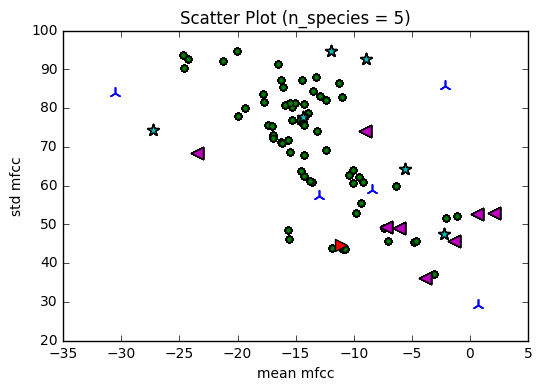

In [10]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean mfcc', 'std mfcc')

## kNN

In [39]:
util.kNN(data, labels, range(3,10), 5)

3-Neighbors | Accuracy: 0.74 (+/- 0.30) | Weight: uniform
3-Neighbors | Accuracy: 0.73 (+/- 0.24) | Weight: distance
4-Neighbors | Accuracy: 0.75 (+/- 0.27) | Weight: uniform
4-Neighbors | Accuracy: 0.74 (+/- 0.25) | Weight: distance
5-Neighbors | Accuracy: 0.71 (+/- 0.24) | Weight: uniform
5-Neighbors | Accuracy: 0.74 (+/- 0.25) | Weight: distance
6-Neighbors | Accuracy: 0.70 (+/- 0.22) | Weight: uniform
6-Neighbors | Accuracy: 0.75 (+/- 0.27) | Weight: distance
7-Neighbors | Accuracy: 0.72 (+/- 0.23) | Weight: uniform
7-Neighbors | Accuracy: 0.76 (+/- 0.28) | Weight: distance
8-Neighbors | Accuracy: 0.71 (+/- 0.21) | Weight: uniform
8-Neighbors | Accuracy: 0.74 (+/- 0.24) | Weight: distance
9-Neighbors | Accuracy: 0.72 (+/- 0.17) | Weight: uniform
9-Neighbors | Accuracy: 0.74 (+/- 0.18) | Weight: distance


## Naïve-Bayes

In [40]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, labels, cv = 5)
print(scores)

[ 0.86363636  0.71428571  0.80952381  0.89473684  0.63157895]


## SVM

In [41]:
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, data, labels, cv = 5)
print(scores)

[ 0.77272727  0.61904762  0.80952381  0.84210526  0.57894737]
